In [44]:
#importing libraries

import pandas as pd
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline
from scipy.stats import norm
from scipy.stats import skew
from scipy import stats
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [45]:
#read csv file
data = pd.read_csv("house.csv")
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,lat,long,Regionname,Propertycount
0,Mulgrave,35 Bevis St,3,h,9000000,PI,Hall,29/07/2017,18.8,3170,...,1,1,744,117.0,1960,Monash City Council,-37.93168,145.16126,South-Eastern Metropolitan,7113
1,Canterbury,49 Mangarra Rd,5,h,8000000,VB,Sotheby's,13/05/2017,9.0,3126,...,5,4,2079,464.3,1880,Boroondara City Council,-37.81790,145.06940,Southern Metropolitan,3265
2,Hawthorn,49 Lisson Gr,4,h,7650000,S,Abercromby's,17/06/2017,5.3,3122,...,2,4,1690,284.0,1863,Boroondara City Council,-37.82652,145.03052,Southern Metropolitan,11308
3,Kew,15 Barry St,6,h,6500000,S,Jellis,13/08/2016,5.6,3101,...,6,3,1334,365.0,1890,Boroondara City Council,-37.80290,145.02670,Southern Metropolitan,10331
4,Middle Park,136 Page St,5,h,6400000,S,Marshall,9/09/2017,3.0,3206,...,2,1,553,308.0,1920,Port Phillip City Council,-37.84908,144.95753,Southern Metropolitan,2019


In [46]:
#check price distribution
data.Price.describe()

count    8.059000e+03
mean     1.083538e+06
std      6.757418e+05
min      1.310000e+05
25%      6.350000e+05
50%      8.900000e+05
75%      1.335000e+06
max      9.000000e+06
Name: Price, dtype: float64

C:\Users\nikhi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "



 mu = 1083537.58 and sigma = 675699.91



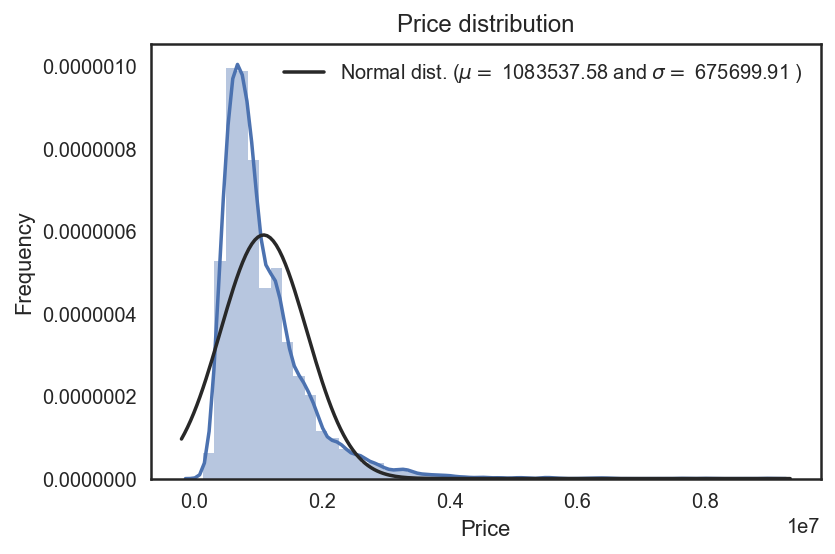

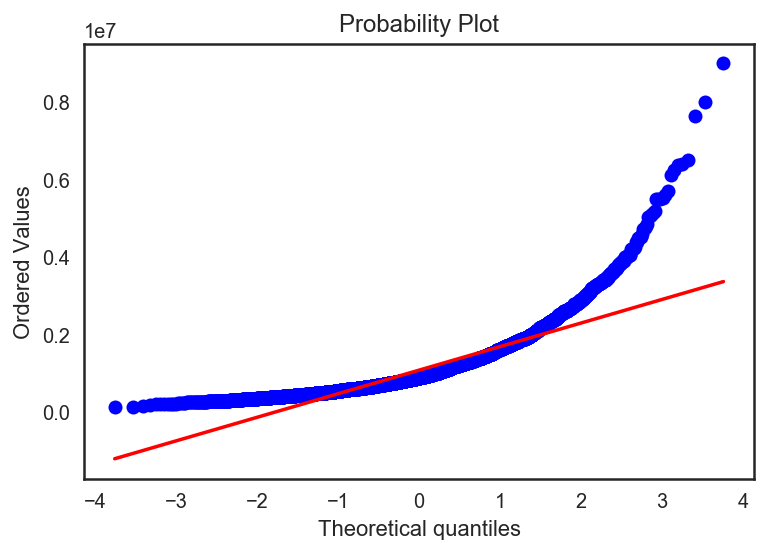

In [47]:
#Price distribution
sns.distplot(data['Price'] , fit=norm)
(mu, sigma) = norm.fit(data['Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

fig = plt.figure()
res = stats.probplot(data['Price'], plot=plt)
plt.show()

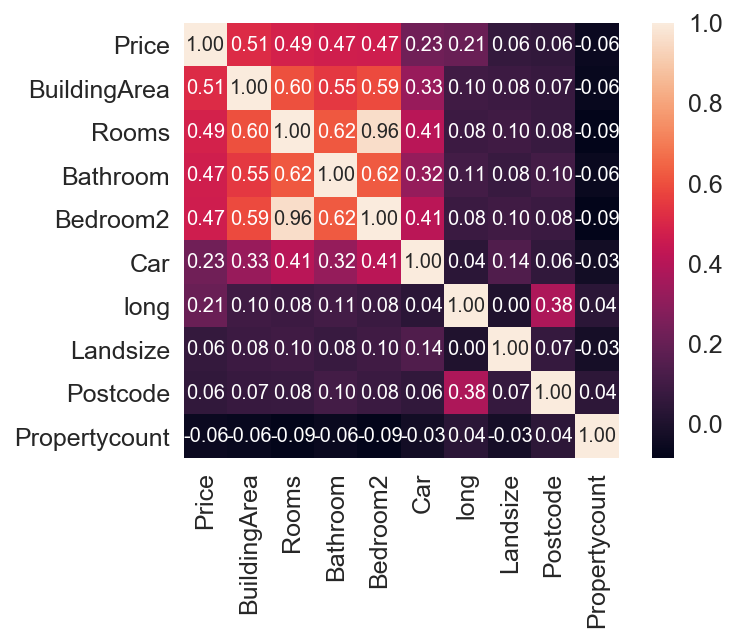

In [49]:
#correlation matrix 
k = 10 #number of variables for heatmap
corrmat = data.corr()
cols = corrmat.nlargest(k, 'Price')['Price'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [50]:
#most correlated variables
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,Price
1,BuildingArea
2,Rooms
3,Bathroom
4,Bedroom2
5,Car
6,long
7,Landsize
8,Postcode
9,Propertycount


## Finding outliers in the data

### *** 1. Bathroom Outliers***

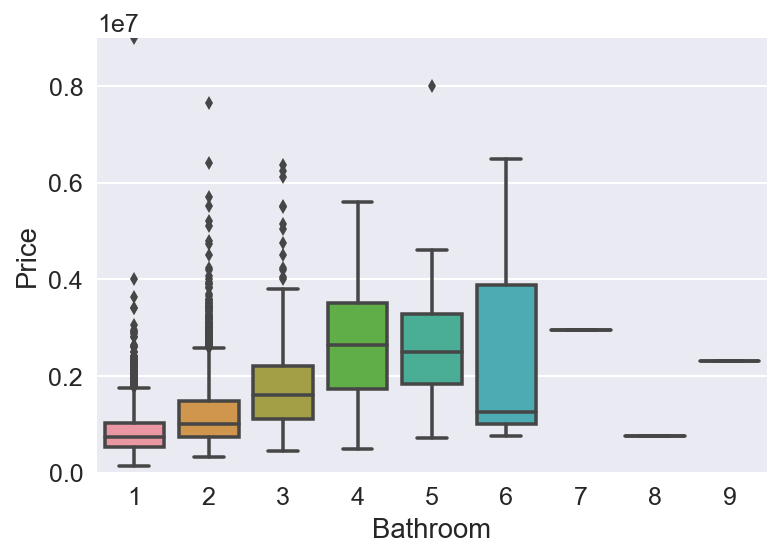

In [51]:
fig = sns.boxplot(x=data['Bathroom'], y="Price", data=data)
fig.axis(ymin=0, ymax=9000000);


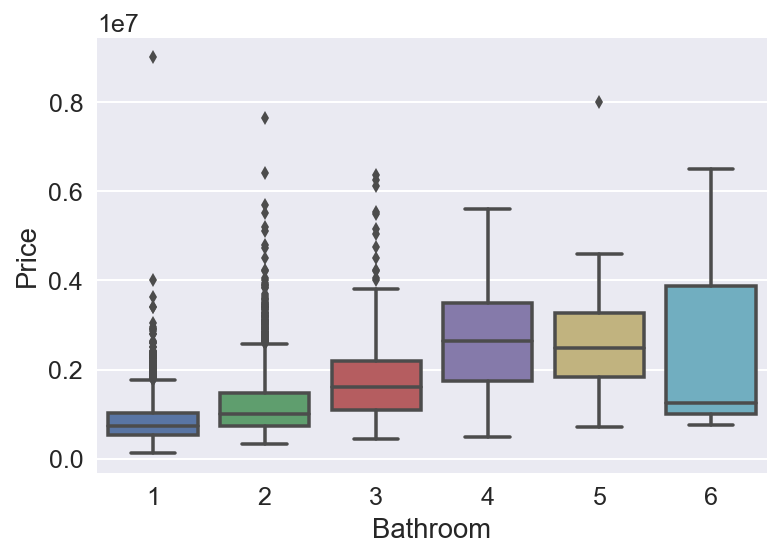

In [52]:
#data[(data['Bathroom']>6) & (data['Price']<4000000)]
data = data.drop(data[(data['Bathroom']>6) & (data['Price']<4000000)].index).reset_index(drop=True)
#sns.jointplot(x=data['Bathroom'], y=data['Price'], kind='reg')
fig = sns.boxplot(x=data['Bathroom'], y="Price", data=data)

### *** 2. Bedroom Outliers***

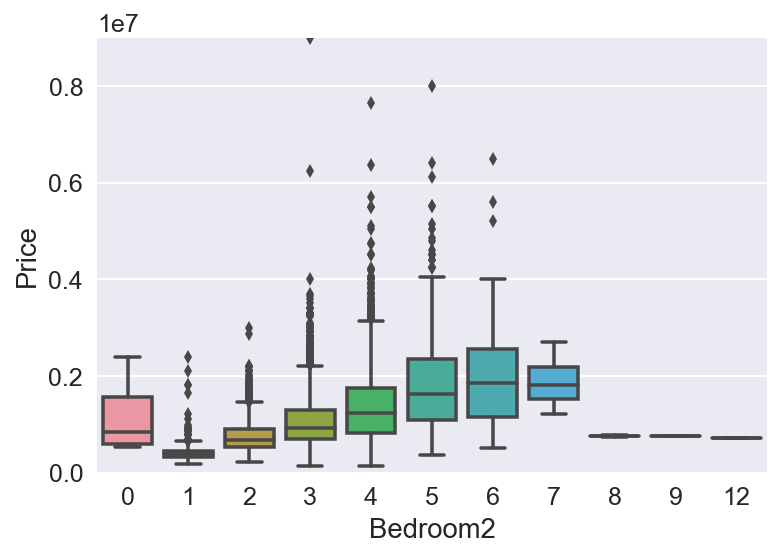

In [53]:
fig = sns.boxplot(x=data['Bedroom2'], y="Price", data=data)
fig.axis(ymin=0, ymax=9000000);


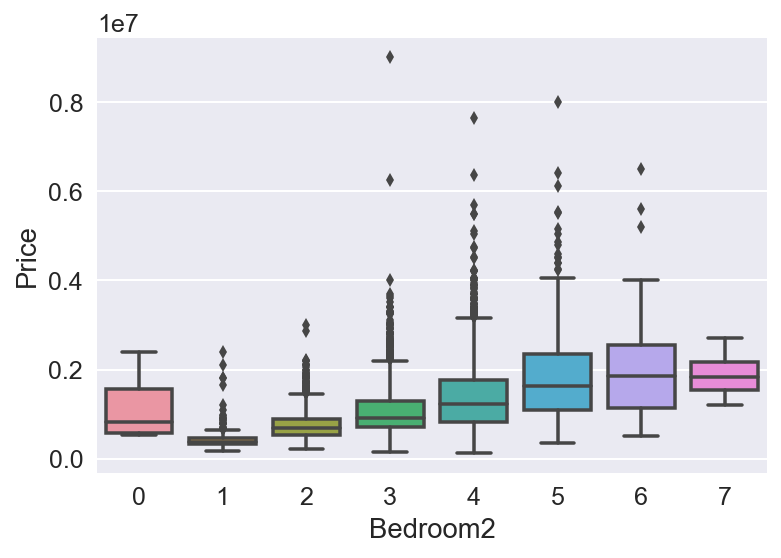

In [54]:
#data.Bedroom2[(data['Bedroom2']>7) & (data['Price']<4000000)]
data = data.drop(data[(data['Bedroom2']>7) & (data['Price']<4000000)].index).reset_index(drop=True)
#sns.jointplot(x=data['Bathroom'], y=data['Price'], kind='reg')
fig = sns.boxplot(x=data['Bedroom2'], y="Price", data=data)

### *** 3. Rooms Outliers***

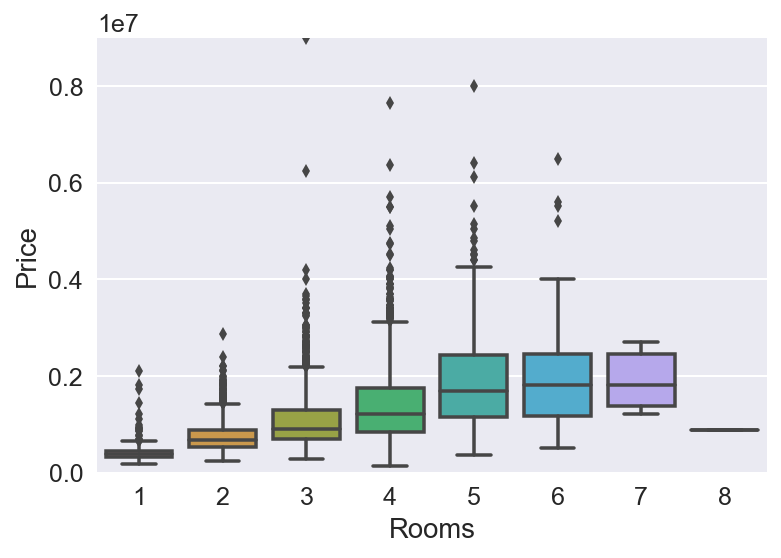

In [55]:
fig = sns.boxplot(x=data['Rooms'], y="Price", data=data)
fig.axis(ymin=0, ymax=9000000);


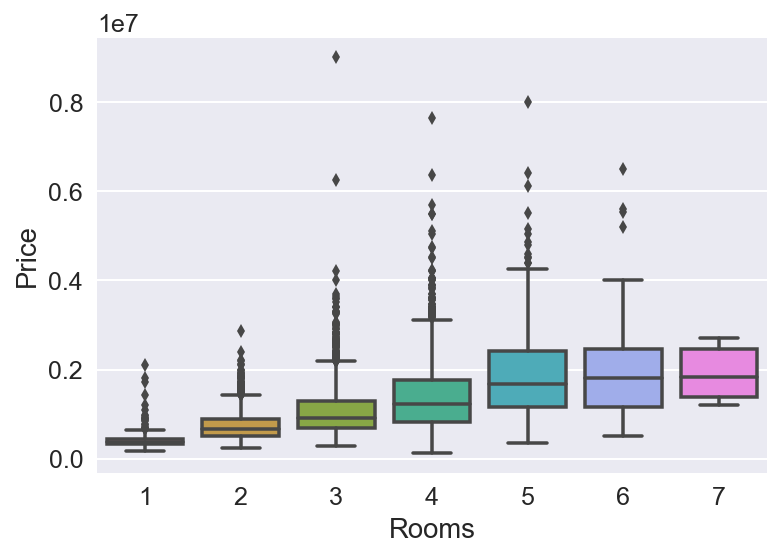

In [56]:
#data.Bedroom2[(data['Bedroom2']>7) & (data['Price']<4000000)]
data = data.drop(data[(data['Rooms']>7) & (data['Price']<4000000)].index).reset_index(drop=True)
#sns.jointplot(x=data['Bathroom'], y=data['Price'], kind='reg')
fig = sns.boxplot(x=data['Rooms'], y="Price", data=data)

### *** 4. Building Area Outliers***

C:\Users\nikhi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


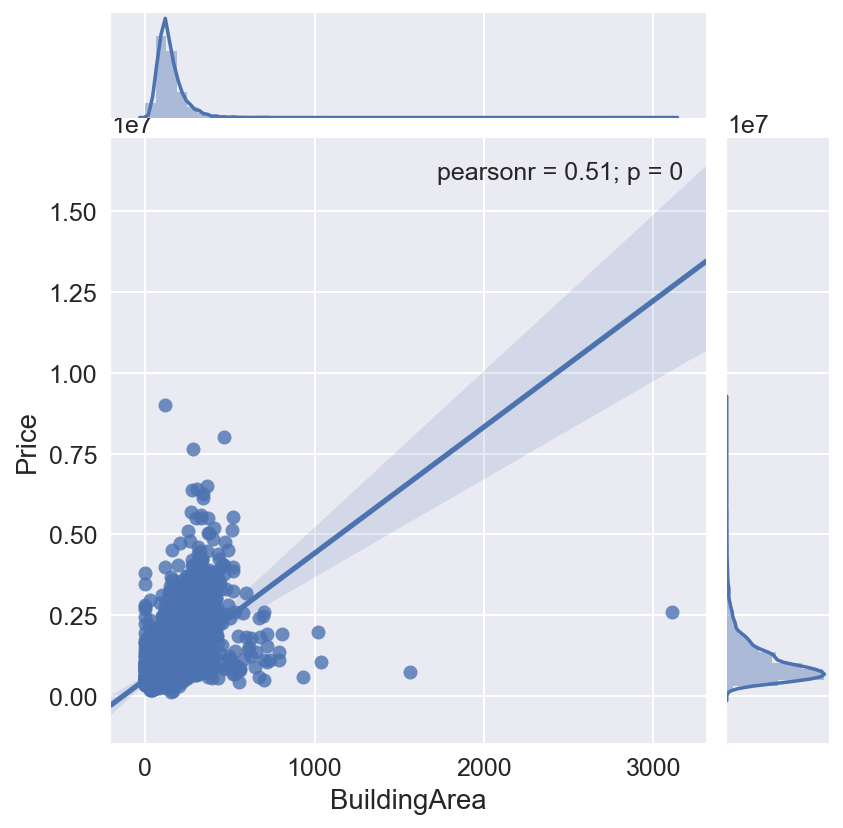

In [57]:
#fig = sns.boxplot(x=data['BuildingArea'], y="Price", data=data)
sns.jointplot(x=data['BuildingArea'], y=data['Price'], kind='reg')
fig.axis(ymin=0, ymax=9000000);


C:\Users\nikhi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


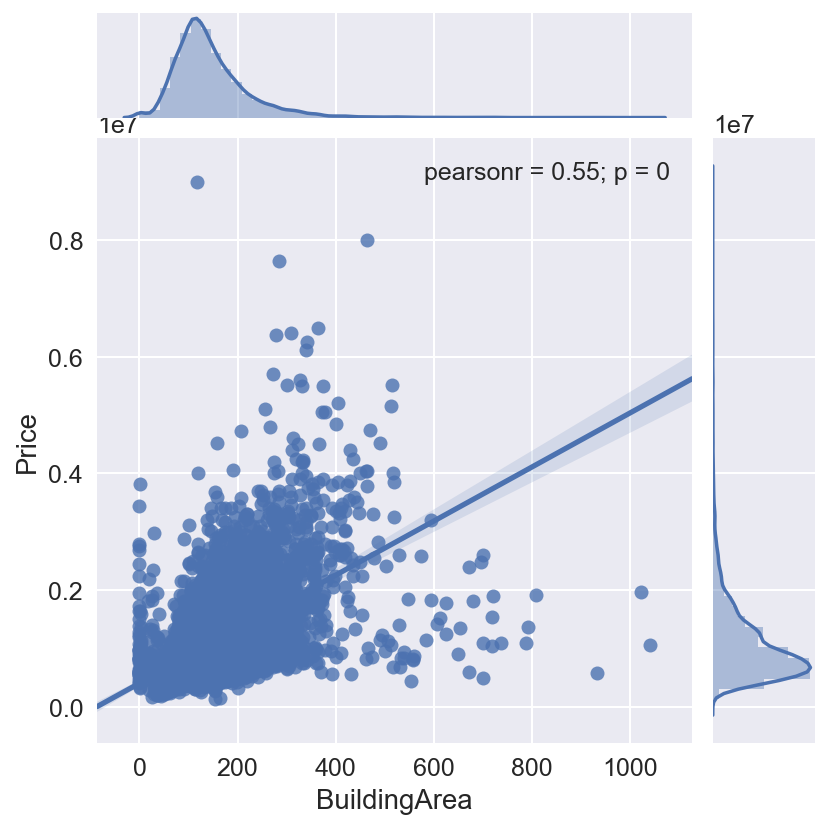

In [58]:
#data.Bedroom2[(data['Bedroom2']>7) & (data['Price']<4000000)]
data = data.drop(data[(data['BuildingArea']>1300) & (data['Price']<5000000)].index).reset_index(drop=True)
#sns.jointplot(x=data['Bathroom'], y=data['Price'], kind='reg')
sns.jointplot(x=data['BuildingArea'], y=data['Price'], kind='reg')

### *** 5. Cars Outliers***

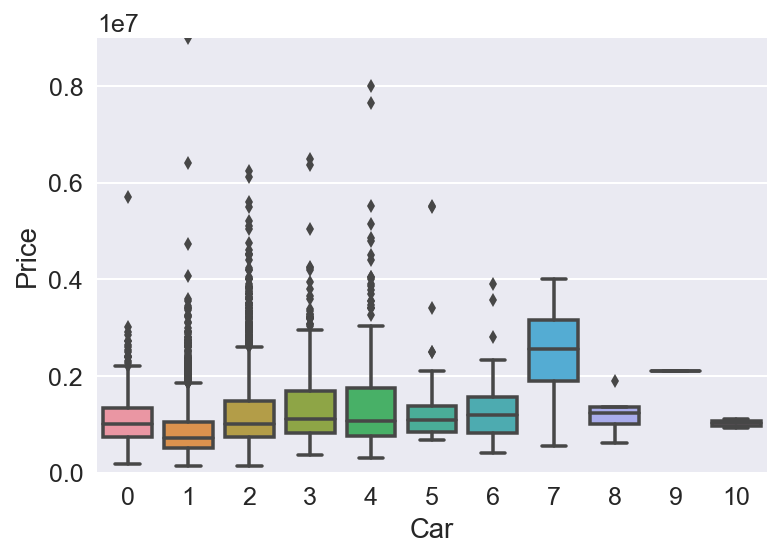

In [59]:
fig = sns.boxplot(x=data['Car'], y="Price", data=data)
fig.axis(ymin=0, ymax=9000000);


C:\Users\nikhi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


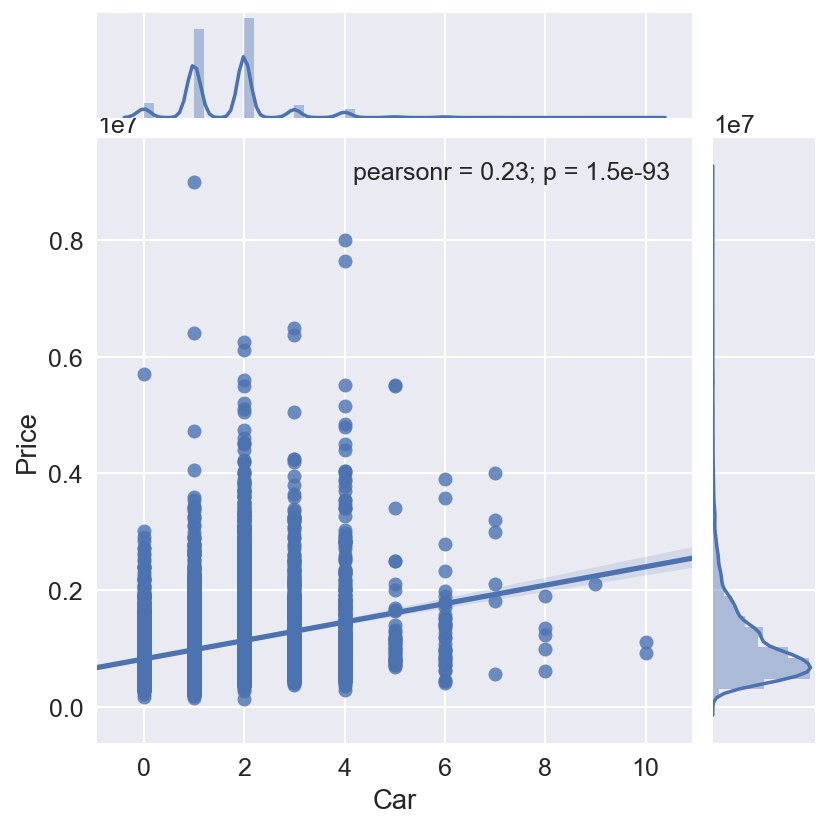

In [60]:
#fig = sns.boxplot(x=data['BuildingArea'], y="Price", data=data)
sns.jointplot(x=data['Car'], y=data['Price'], kind='reg')
fig.axis(ymin=0, ymax=9000000);


C:\Users\nikhi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


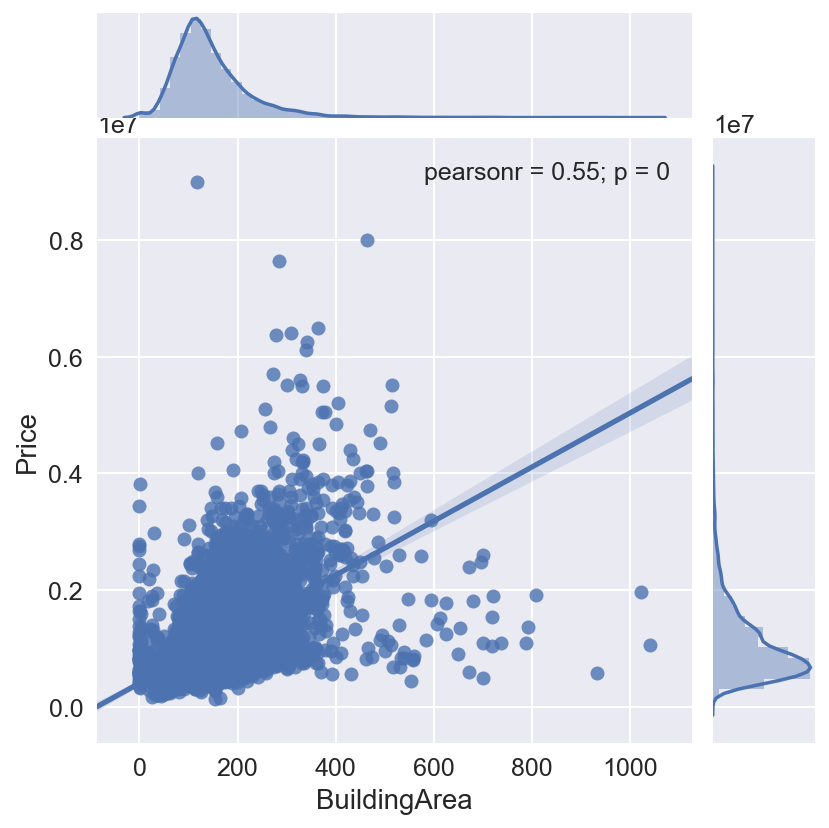

In [61]:
#data.Bedroom2[(data['Bedroom2']>7) & (data['Price']<4000000)]
data = data.drop(data[(data['Car']>9) & (data['Price']<5000000)].index).reset_index(drop=True)
#sns.jointplot(x=data['Bathroom'], y=data['Price'], kind='reg')
sns.jointplot(x=data['BuildingArea'], y=data['Price'], kind='reg')

In [63]:
len(data)

8047

In [65]:
#converting data to csv
data.to_csv("Mel_housing_data.csv")

In [66]:
df = pd.DataFrame(data)
len(df['Suburb'].value_counts())

310

In [67]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'lat', 'long',
       'Regionname', 'Propertycount'],
      dtype='object')

In [68]:
data.shape

(8047, 21)

### Price prediction (Linear Regression)

In [69]:
data.drop(data.columns[[0, 1, 3, 5, 6, 16, 17, 19]], axis=1, inplace=True)
data.head()

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,long,Propertycount
0,3,9000000,29/07/2017,18.8,3170,3,1,1,744,117.0,1960,145.16126,7113
1,5,8000000,13/05/2017,9.0,3126,5,5,4,2079,464.3,1880,145.06940,3265
2,4,7650000,17/06/2017,5.3,3122,4,2,4,1690,284.0,1863,145.03052,11308
3,6,6500000,13/08/2016,5.6,3101,6,6,3,1334,365.0,1890,145.02670,10331
4,5,6400000,9/09/2017,3.0,3206,5,2,1,553,308.0,1920,144.95753,2019


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 13 columns):
Rooms            8047 non-null int64
Price            8047 non-null int64
Date             8047 non-null object
Distance         8047 non-null float64
Postcode         8047 non-null int64
Bedroom2         8047 non-null int64
Bathroom         8047 non-null int64
Car              8047 non-null int64
Landsize         8047 non-null int64
BuildingArea     8047 non-null float64
YearBuilt        8047 non-null int64
long             8047 non-null float64
Propertycount    8047 non-null int64
dtypes: float64(3), int64(9), object(1)
memory usage: 817.4+ KB


In [72]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,long,Propertycount
count,8047.000000,8.047000e+03,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000
mean,3.055052,1.083257e+06,10.923412,3109.869020,3.030943,1.622965,1.659252,516.086989,146.473136,1965.317385,144.991641,7453.964335
std,0.958018,6.755027e+05,6.671586,108.029345,0.955725,0.709132,0.955489,1004.564332,80.931723,37.154442,0.115413,4378.160912
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,144.423790,290.000000
25%,2.000000,6.350000e+05,6.400000,3044.000000,2.000000,1.000000,1.000000,197.000000,97.000000,1945.000000,144.921785,4380.000000
50%,3.000000,8.905000e+05,9.900000,3083.000000,3.000000,2.000000,2.000000,463.000000,130.000000,1970.000000,144.997700,6567.000000
75%,4.000000,1.335000e+06,13.800000,3150.000000,4.000000,2.000000,2.000000,651.500000,177.000000,2000.000000,145.062300,10331.000000
max,7.000000,9.000000e+06,47.400000,3977.000000,7.000000,6.000000,9.000000,40469.000000,1041.000000,2018.000000,145.526350,21650.000000


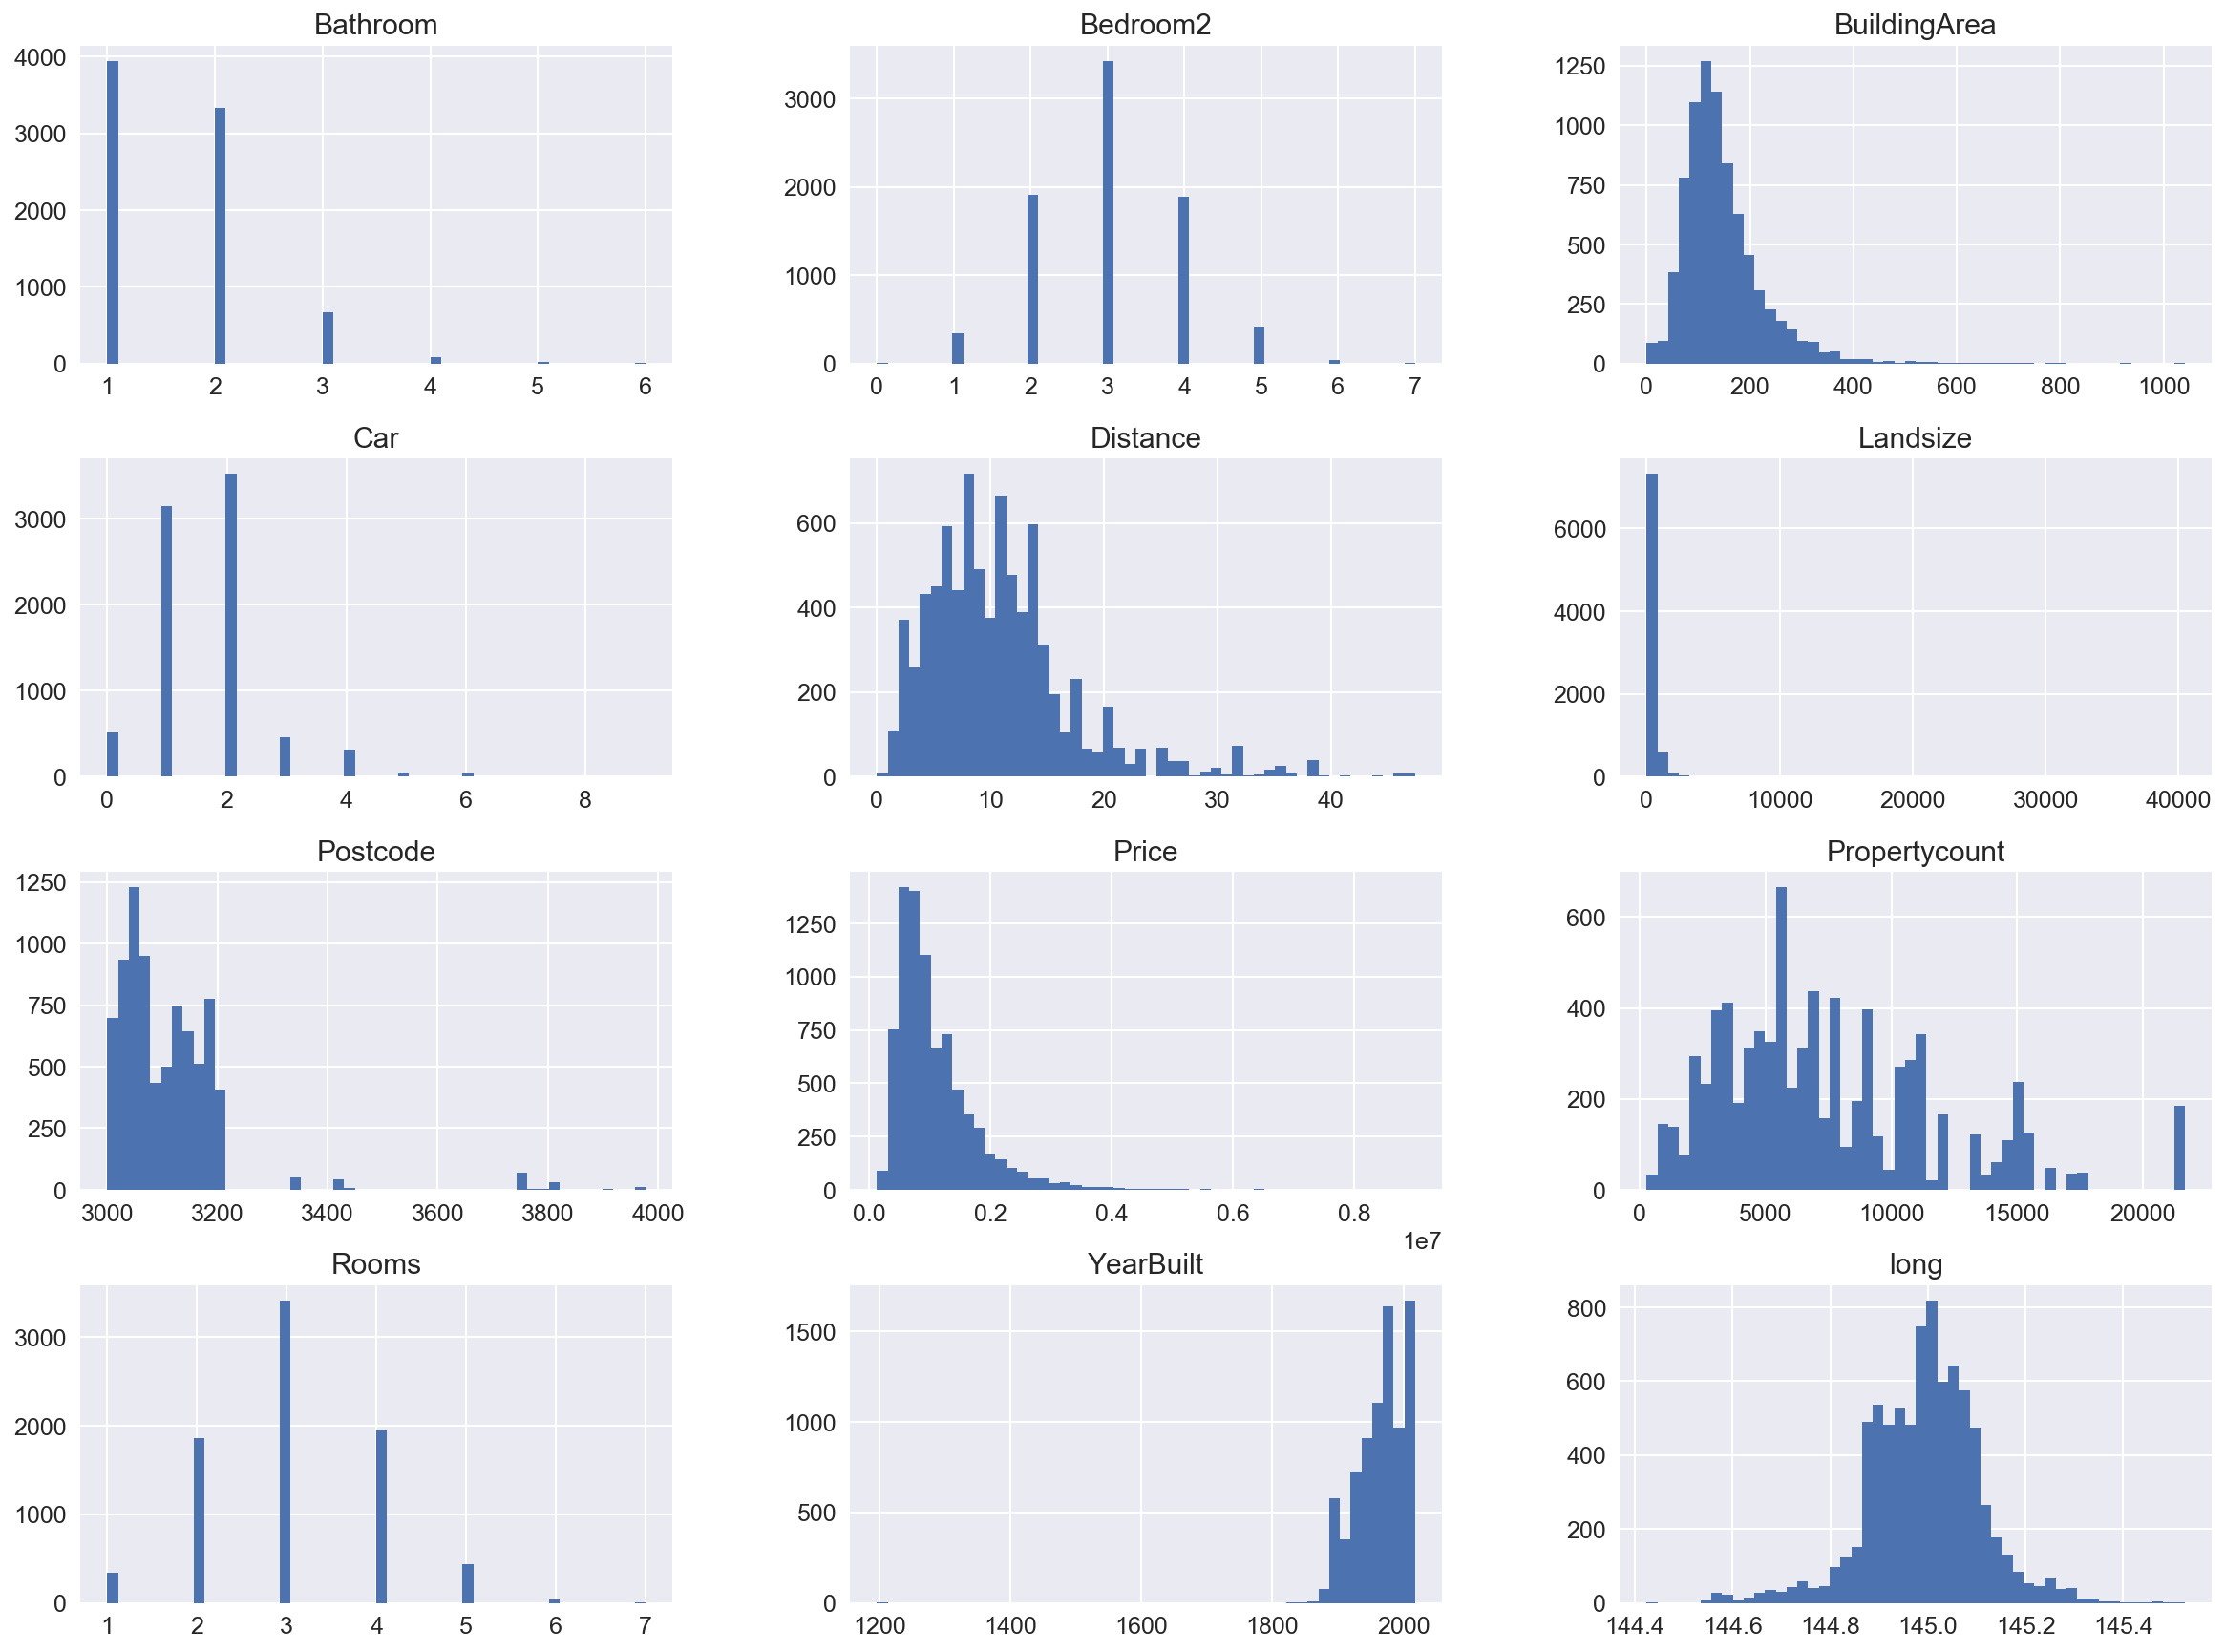

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [74]:
data.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,long,Propertycount
Rooms,1.000000,0.490763,0.284180,0.077882,0.964756,0.619638,0.411121,0.098164,0.658461,-0.010324,0.087838,-0.085220
Price,0.490763,1.000000,-0.209563,0.055605,0.477288,0.478955,0.228093,0.062411,0.554754,-0.307231,0.208397,-0.056136
Distance,0.284180,-0.209563,1.000000,0.485104,0.292640,0.119533,0.261153,0.127328,0.154126,0.293782,0.182663,-0.016314
Postcode,0.077882,0.055605,0.485104,1.000000,0.081611,0.106521,0.055797,0.066787,0.075603,0.078707,0.378388,0.043383
Bedroom2,0.964756,0.477288,0.292640,0.081611,1.000000,0.613763,0.413726,0.097892,0.643913,0.000234,0.087454,-0.084813
Bathroom,0.619638,0.478955,0.119533,0.106521,0.613763,1.000000,0.317913,0.077371,0.602422,0.185833,0.110677,-0.057638
Car,0.411121,0.228093,0.261153,0.055797,0.413726,0.317913,1.000000,0.142082,0.349724,0.130680,0.037610,-0.037925
Landsize,0.098164,0.062411,0.127328,0.066787,0.097892,0.077371,0.142082,1.000000,0.091577,0.037857,0.004707,-0.026458
BuildingArea,0.658461,0.554754,0.154126,0.075603,0.643913,0.602422,0.349724,0.091577,1.000000,0.056748,0.103997,-0.069688
YearBuilt,-0.010324,-0.307231,0.293782,0.078707,0.000234,0.185833,0.130680,0.037857,0.056748,1.000000,-0.018271,0.012951


In [75]:
data['Date'] = data.Date.convert_objects(convert_numeric=True)

C:\Users\nikhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


#### visualizing the correlation between variables by using Pandas’ scatter_matrix function

C:\Users\nikhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


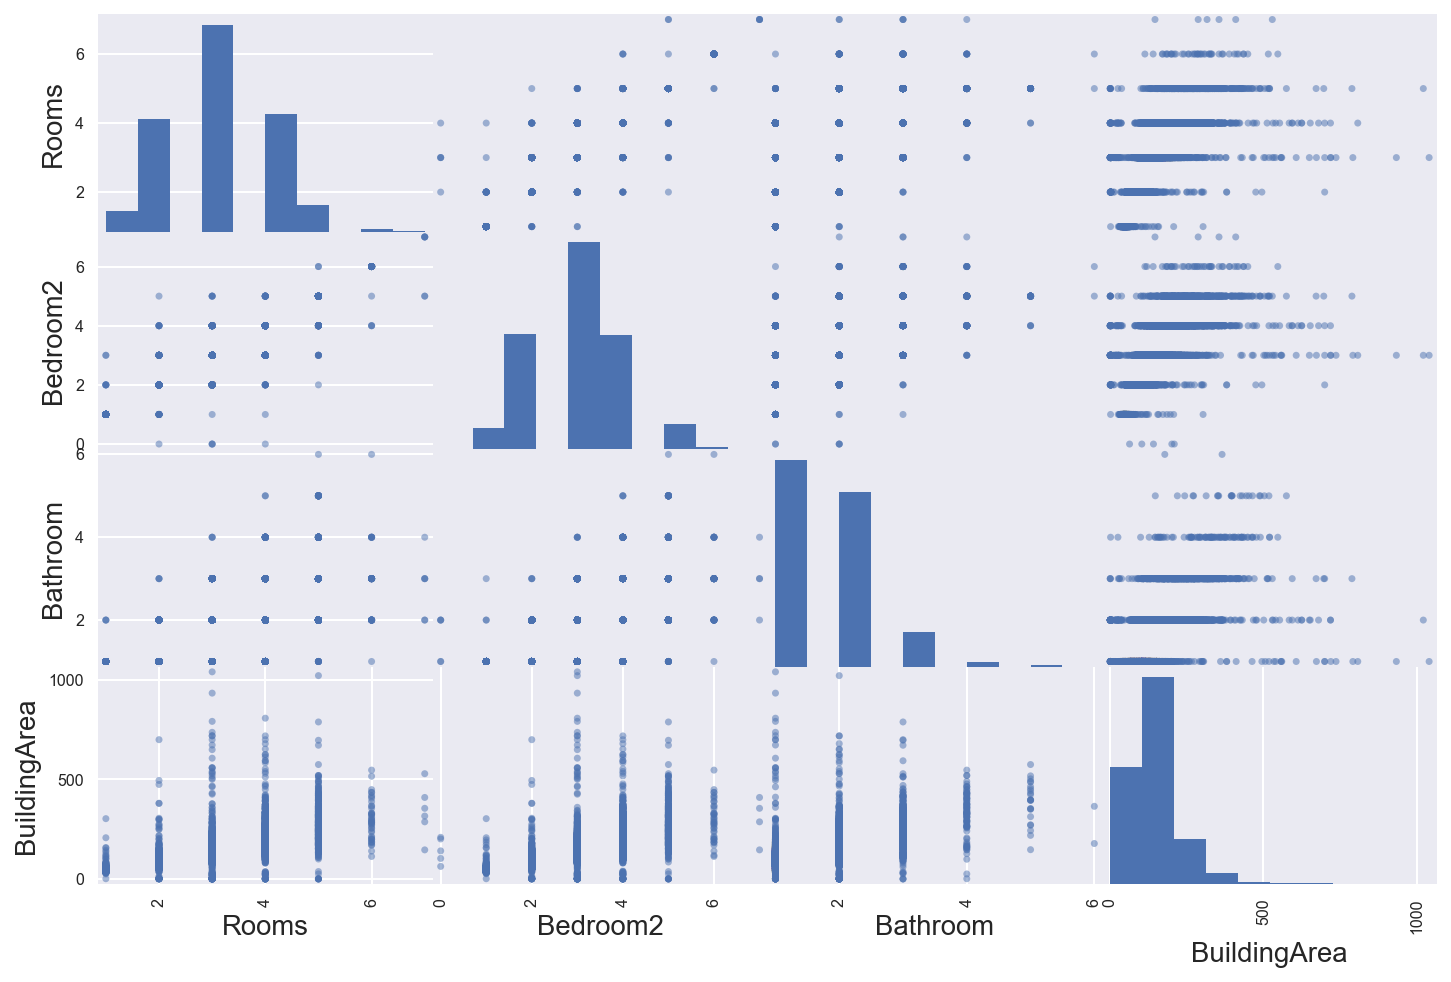

In [76]:
attributes = ["Rooms", "Bedroom2", "Bathroom", "BuildingArea"]
scatter_matrix(data[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

In [77]:
from sklearn.cross_validation import train_test_split

Y = data['Price']
X = data[['Rooms','Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'long', 'Propertycount']]

In [78]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
y_pred = regressor.predict(X_test)
print('Linear Regression R squared": %.4f' % regressor.score(X_test, y_test))

Linear Regression R squared": 0.6233


## Random Forest


In [80]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [81]:
print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))

Random Forest R squared": 0.7825
